<a href="https://colab.research.google.com/github/Bigbear7779/cv/blob/main/number_identify_tutoria_LeNe_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Further Reading
--------------
- `torch.nn API <https://pytorch.org/docs/stable/nn.html>`_



# 新段落

# 新段落

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
n_epochs = 20 # 模型训练20轮
log_interval = 210 #控制打印频率的，设n = 210*batch_size，即n张图后打印一次进度
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu") # 根据设备是否支持GPU来选择硬件 
size = 32 # 对输入图片进行处理，拉伸为32*32的图片，这是为了复刻手写数字识别的神经网络，其输入为32*32的灰度图像
learn_rate = 0.03 # 学习率
momentum = 0.1  # 动量


In [ ]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz

from torchvision.datasets import MNIST


transform = transforms.Compose(
    [ transforms.Resize(size), transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

trainset = MNIST(root = './', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = MNIST(root = './', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=True, num_workers=2)



# classes = ('1', '2', '3', '4', '5', '6', '7', '8', '9', '0')


--2021-07-07 12:51:17--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-07-07 12:51:17--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz.1’

MNIST.tar.gz.1          [        <=>         ]  33.20M  20.3MB/s    in 1.6s    

2021-07-07 12:51:19 (20.3 MB/s) - ‘MNIST.tar.gz.1’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw

In [ ]:
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_targets)
print(example_data.shape)

tensor([8, 8, 6, 0, 1, 0, 7, 7, 8, 1, 7, 4, 4, 3, 8, 8, 3, 4, 6, 2, 7, 6, 1, 7,
        3, 9, 4, 8, 8, 1, 0, 5, 7, 9, 0, 0, 9, 5, 5, 4, 5, 6, 1, 8, 0, 7, 0, 1,
        2, 7, 6, 8, 1, 1, 2, 3, 7, 9, 2, 3, 5, 4, 3, 8, 2, 9, 1, 9, 0, 9, 6, 4,
        2, 3, 3, 6, 1, 2, 9, 7, 3, 4, 0, 9, 2, 7, 2, 4, 1, 2, 9, 7, 7, 3, 7, 4,
        0, 0, 7, 2, 3, 1, 3, 2, 6, 9, 6, 8, 3, 1, 3, 4, 6, 4, 0, 2, 5, 6, 6, 1,
        6, 3, 2, 0, 3, 9, 4, 8, 0, 7, 6, 9, 2, 6, 7, 7, 4, 5, 0, 7, 7, 5, 0, 0,
        7, 8, 6, 6, 9, 9, 8, 1, 0, 1, 0, 3, 4, 1, 0, 3, 5, 6, 4, 8, 6, 2, 5, 4,
        4, 0, 5, 8, 9, 9, 1, 9, 7, 3, 9, 3, 8, 9, 1, 6, 2, 6, 2, 0, 0, 1, 1, 4,
        2, 2, 4, 2, 0, 9, 6, 1, 8, 0, 1, 4, 2, 9, 1, 3, 2, 6, 3, 2, 6, 0, 5, 4,
        2, 3, 1, 6, 6, 9, 0, 1, 8, 8, 6, 5, 2, 5, 1, 8, 6, 4, 9, 7, 1, 5, 4, 3,
        9, 6, 8, 8, 0, 6, 5, 2, 7, 7, 9, 4, 5, 9, 4, 5, 0, 6, 0, 0, 7, 6, 3, 3,
        5, 8, 6, 3, 9, 2, 7, 5, 6, 9, 9, 6, 5, 8, 4, 3, 2, 7, 1, 3, 8, 1, 5, 9,
        4, 0, 4, 9, 4, 2, 7, 4, 6, 1, 0,

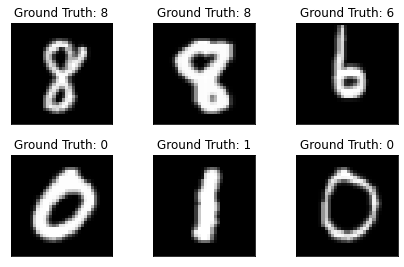

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0, bias=True) # C1层使用单通道，6深度的卷积核，卷积核大小为5
        self.max_pool_1 = nn.MaxPool2d(2)  # maxpooling从28降到14个像素点，故采用大小为2最大池化
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0, bias=True) # 第二次卷积
        self.max_pool_2 = nn.MaxPool2d(2) # 第二次maxpooling
        self.conv3 = nn.Conv2d(16, 120, kernel_size=5, stride=1, padding=0, bias=F) #第三次卷积，得到120张大小为1的“图像”
        
        self.fc1 = nn.Linear(120,84) # 全连接层
        self.fc2 = nn.Linear(84,10) # 全连接层

    def forward(self, x):
        # print("0:"+ str(x.size())) # 输出tensor大小
        x = F.relu(self.conv1(x)) # 用激活函数处理卷积结果，激活函数结果再在下一步做maxpooling
        x = self.max_pool_1(x)
        # print("1:"+ str(x.size()))
        x = F.relu(self.conv2(x)) # 同上
        x = self.max_pool_2(x)
        # print("2:"+ str(x.size()))
        
        
        x = F.relu(self.conv3(x))
        # print("3:"+ str(x.size()))
        # x = F.dropout(x, training=self.training)
        x = x.view(-1, 120) # 把120张大小为1的图像当成一个长度为120的一维tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.log_softmax(x)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0, bias=True) # C1层使用单通道，6深度的卷积核，卷积核大小为5
        self.max_pool_1 = nn.MaxPool2d(2)  # maxpooling从28降到14个像素点，故采用大小为2最大池化
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0, bias=True) # 第二次卷积
        self.max_pool_2 = nn.MaxPool2d(2) # 第二次maxpooling
        self.conv3 = nn.Conv2d(16, 120, kernel_size=5, stride=1, padding=0, bias=F) #第三次卷积，得到120张大小为1的“图像”
        
        self.fc1 = nn.Linear(120,84) # 全连接层
        self.fc2 = nn.Linear(84,10) # 全连接层

    def forward(self, x):
        # print("0:"+ str(x.size())) # 输出tensor大小
        x = F.relu(self.conv1(x)) # 用激活函数处理卷积结果，激活函数结果再在下一步做maxpooling
        x = self.max_pool_1(x)
        # print("1:"+ str(x.size()))
        x = F.relu(self.conv2(x)) # 同上
        x = self.max_pool_2(x)
        # print("2:"+ str(x.size()))
        
        
        x = F.relu(self.conv3(x))
        # print("3:"+ str(x.size()))
        # x = F.dropout(x, training=self.training)
        x = x.view(-1, 120) # 把120张大小为1的图像当成一个长度为120的一维tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.log_softmax(x)



In [ ]:
network = Net().to(DEVICE)
optimizer = optim.SGD(network.parameters(), lr=learn_rate, momentum=momentum) # 学习率，动量

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(trainloader.dataset) for i in range(n_epochs + 1)] #test_losses为横坐标，test_losses为纵坐标
test_acc = []

In [ ]:
def train(epoch, device):
  network.train() # 调用上一步实例化对象network中的方法（该方法包内已经写好）
  for batch_idx, (data, target) in enumerate(trainloader): # 按batch_size为集合对象进行逐个处理
    data, target = data.to(device), target.to(device) # data是图片，target是标签，device是为了有GPU情况下使用GPU加速
    optimizer.zero_grad() # 开始进行BP之前将梯度设置为零，因为PyTorch会在随后的BP中累积梯度
    output = network(data) 
    loss = F.nll_loss(output, target) # 函数全称是negative log likelihood loss，下面博客有详细解释
    # https://blog.csdn.net/weixin_38145317/article/details/103288032
    loss.backward() # 根据误差进行BP
    optimizer.step()
    if batch_idx % log_interval == 0: # 控制输出频率
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(trainloader.dataset),
        100. * batch_idx / len(trainloader), loss.item()))
      train_losses.append(loss.item()) # 记录并储存train loss
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(trainloader.dataset)))


In [ ]:
def test(device):
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in testloader:
      data, target = data.to(device), target.to(device)
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1] # 找到概率最大的下标，为预测类别
      correct += pred.eq(target.data.view_as(pred)).sum() # x下面都是记录数据用于绘图，不再解释
  test_loss /= len(testloader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(testloader.dataset),
    100. * correct / len(testloader.dataset)))
  test_acc.append(1. * correct / len(testloader.dataset))
    


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3032, Accuracy: 982/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.305624
Train Epoch: 1 [13440/60000 (22%)]	Loss: 2.244073
Train Epoch: 1 [26880/60000 (45%)]	Loss: 0.813500
Train Epoch: 1 [40320/60000 (67%)]	Loss: 0.863362
Train Epoch: 1 [53760/60000 (90%)]	Loss: 0.522930

Test set: Avg. loss: 0.3541, Accuracy: 8717/10000 (87%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.369093
Train Epoch: 2 [13440/60000 (22%)]	Loss: 0.385205
Train Epoch: 2 [26880/60000 (45%)]	Loss: 0.190984
Train Epoch: 2 [40320/60000 (67%)]	Loss: 0.350102
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.514698

Test set: Avg. loss: 0.2851, Accuracy: 8906/10000 (89%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.141563
Train Epoch: 3 [13440/60000 (22%)]	Loss: 0.215936
Train Epoch: 3 [26880/60000 (45%)]	Loss: 0.302702
Train Epoch: 3 [40320/60000 (67%)]	Loss: 0.296959
Train Epoch: 3 [53760/60000 (90%)]	Loss: 0.238993

Test set: Avg. loss: 0.2607, Accuracy: 8961/10000 (90%)

Train Epoch: 4 [0/60000 (0%)]	Loss

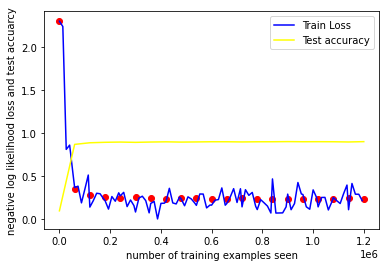

In [ ]:
test(DEVICE)
for epoch in range(1, n_epochs + 1):
  train(epoch, DEVICE)
  test(DEVICE)
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue') # train_losses变化曲线
plt.plot(test_counter, test_acc, color='yellow') # test集accuracy变化曲线
plt.scatter(test_counter, test_losses, color='red') # test集loss散点图
plt.legend(['Train Loss', 'Test accuracy'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss and test accuarcy')
plt.show()


In [ ]:
b=torch.Tensor([[7,8,9],[10,11,12]])

In [ ]:
b.size()

torch.Size([2, 3])

In [ ]:
# examples = enumerate(testloader)
# batch_idx, (example_data, example_targets) = next(examples)
# with torch.no_grad():
#   example_data, example_targets = example_data.to(DEVICE), example_targets.to(DEVICE)
#   output = network(example_data)
# fig = plt.figure()
# for i in range(6):
#   plt.subplot(2,3,i+1)
#   plt.tight_layout()
#   plt.imshow(example_data[i][0].cpu().clone().numpy(), cmap='gray', interpolation='none')
#   plt.title("Prediction: {}".format(
#     output.data.max(1, keepdim=True)[1][i].item()))
#   plt.xticks([])
#   plt.yticks([])
# plt.show()

In [ ]:
# lrs = [a/10 for a in range(1, 9, 5)]
# momentums = [a/10 for a in range(1, 9, 5)]
# import matplotlib.pyplot as plt
# fig = plt.figure()
# test_acc = 0
# legent = []
# j = 0
# for lr in lrs:
#   for momentum in momentums:
#     legent.append(str(lr) + "," + str(momentum))
#     network = Net().to(DEVICE)
#     optimizer = optim.SGD(network.parameters(), lr=lr, momentum=momentum) # 学习率，动量
#     for epoch in range(1, n_epochs + 1):
#       train(epoch, DEVICE)
#       test(DEVICE)
    
#     test(DEVICE)
#     test_counter = [i for i in range(n_epochs + 1)]
#     plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
#     plt.plot(j, test_acc, 'o') # test集accuracy变化散点图
#     plt.xlabel('number of training examples seen')
#     plt.ylabel('negative log likelihood loss')
    

   
#     test_acc = 0
#     test_counter = [i*len(trainloader.dataset) for i in range(n_epochs + 1)]
# plt.legend(legent, loc='upper left')
# plt.xlabel('number of training examples seen')
# plt.ylabel('negative log likelihood loss')    
# plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299317
Train Epoch: 1 [13440/60000 (22%)]	Loss: 0.718279


KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>